<a href="https://www.kaggle.com/code/bijaybeezoe/retail-price-optimization-demand-modeling?scriptVersionId=281979292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Retail Price Optimization — Elasticity, Demand Modeling & Profit Maximization

## Notebook Overview

This notebook performs **end-to-end data-driven pricing optimization**, including:

* Data cleaning & feature engineering
* Building a demand prediction model
* Estimating price elasticity
* Simulating pricing experiments
* Optimizing price for maximum profit
* Visualizing demand & profit curves
* Generating actionable pricing insights

# Setup & Data Loading

## Basic imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Modeling

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Display settings

In [3]:
pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")

## Loading dataset 

In [4]:
df = pd.read_csv("/kaggle/input/retail-price-optimization/retail_price.csv")
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [7]:
# Checking missing values
df.isna().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [8]:
df[df.duplicated()]

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price


In [9]:
# Converting month_year to datetime
df["month_year"] = pd.to_datetime(df["month_year"], format="mixed", dayfirst=True)
df["year"] = df["month_year"].dt.year
df["month"] = df["month_year"].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   product_id                  676 non-null    object        
 1   product_category_name       676 non-null    object        
 2   month_year                  676 non-null    datetime64[ns]
 3   qty                         676 non-null    int64         
 4   total_price                 676 non-null    float64       
 5   freight_price               676 non-null    float64       
 6   unit_price                  676 non-null    float64       
 7   product_name_lenght         676 non-null    int64         
 8   product_description_lenght  676 non-null    int64         
 9   product_photos_qty          676 non-null    int64         
 10  product_weight_g            676 non-null    int64         
 11  product_score               676 non-null    float64       

# Feature Engineering

In [10]:
features = [
    "unit_price", "freight_price", "product_weight_g",
    "product_description_lenght", "product_photos_qty",
    "product_score", "customers", "weekday", "weekend",
    "holiday", "month", "year", "comp_1", "comp_2", "comp_3",
    "lag_price"
]

target = "qty"

## Relative price vs competitors

In [11]:
df["price_comp_ratio_1"] = df["unit_price"] / df["comp_1"]
df["price_comp_ratio_2"] = df["unit_price"] / df["comp_2"]
df["price_comp_ratio_3"] = df["unit_price"] / df["comp_3"]

features += ["price_comp_ratio_1", "price_comp_ratio_2", "price_comp_ratio_3"]

### Retail demand depends not only on price but also competitor prices.

> Ratio such as above allows us to measure **relative price postioning**, which is essential in category pricing.

# Exploratory Analysis

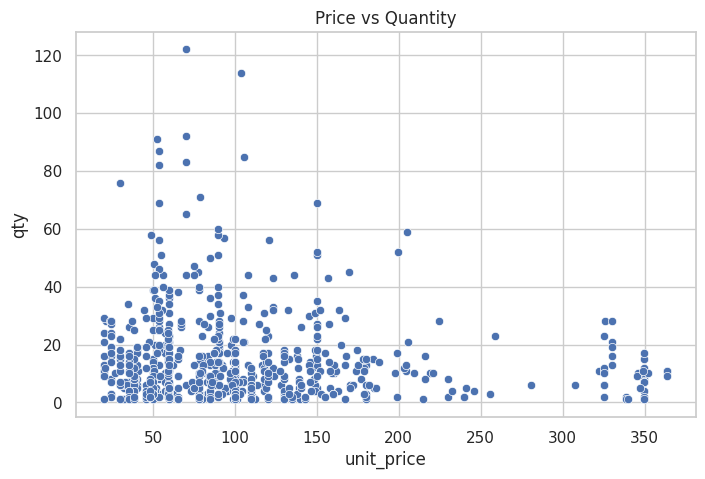

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="unit_price", y="qty")
plt.title("Price vs Quantity")
plt.show()

# Demand Modeling

In [13]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=400, random_state=42, max_depth=12
)

model.fit(X_train, y_train)

print("Model R²:", model.score(X_test, y_test))

Model R²: 0.4949260720115469


**The Random Forest captures non-linear demand patterns such as diminishing returns & competitor interactions, making it well suited for pricing optimization.**

# Price Elasticity Calculation (with Competition)

In [14]:
def compute_elasticity(row):
    base = row.copy()
    up = row.copy()

    # +1% price increase
    up["unit_price"] *= 1.01

    # Predict demand
    q_base = model.predict([base[features]])[0]
    q_up = model.predict([up[features]])[0]

    elasticity = ((q_up - q_base) / q_base) / 0.01
    return elasticity

df["elasticity"] = df.apply(compute_elasticity, axis=1)
df["elasticity"].describe()


count    676.000000
mean       0.192546
std        1.934124
min       -5.438328
25%       -0.003782
50%        0.000000
75%        0.000000
max       32.850587
Name: elasticity, dtype: float64

# Competition-Adjusted Pricing Simulation

In [15]:
def simulate_price_change(row, pct_change):
    sim = row.copy()
    sim["unit_price"] *= (1 + pct_change)
    return model.predict([sim[features]])[0]

df["q_minus_10"] = df.apply(lambda r: simulate_price_change(r, -0.10), axis=1)
df["q_plus_10"]  = df.apply(lambda r: simulate_price_change(r, 0.10), axis=1)

In [16]:
df.head(10)

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,price_comp_ratio_1,price_comp_ratio_2,price_comp_ratio_3,elasticity,q_minus_10,q_plus_10
0,bed1,bed_bath_table,2017-05-01,1,45.95,15.100000,45.950000,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.900000,3.9,15.011897,215.000000,4.4,8.760000,45.950000,4.0,15.100000,45.900000,0.511123,0.213721,1.0,0.0,8.768283,9.156191
1,bed1,bed_bath_table,2017-06-01,3,137.85,12.933333,45.950000,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.900000,3.9,14.769216,209.000000,4.4,21.322000,45.950000,4.0,12.933333,45.950000,0.511123,0.219856,1.0,0.0,9.724969,9.932650
2,bed1,bed_bath_table,2017-07-01,6,275.70,14.840000,45.950000,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.900000,3.9,13.993833,205.000000,4.4,22.195932,45.950000,4.0,14.840000,45.950000,0.511123,0.224146,1.0,0.0,20.889109,22.147977
3,bed1,bed_bath_table,2017-08-01,4,183.80,14.287500,45.950000,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.900000,3.9,14.656757,199.509804,4.4,19.412885,45.950000,4.0,14.287500,45.950000,0.511123,0.230314,1.0,0.0,11.900210,12.254798
4,bed1,bed_bath_table,2017-09-01,2,91.90,15.100000,45.950000,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.900000,3.9,18.776522,163.398710,4.4,24.324687,45.950000,4.0,15.100000,45.950000,0.511123,0.281214,1.0,0.0,5.523664,5.882541
5,bed1,bed_bath_table,2017-10-01,3,137.85,15.100000,45.950000,39,161,2,350,4.0,50,22,9,2,10,2017,8.333333,3800,89.900000,3.9,21.572143,45.950000,4.0,15.100000,45.950000,4.0,15.100000,45.950000,0.511123,1.000000,1.0,0.0,8.819925,8.797881
6,bed1,bed_bath_table,2017-11-01,11,445.85,15.832727,40.531818,39,161,2,350,4.0,97,22,8,4,11,2017,30.555556,3800,89.900000,3.9,16.294000,40.531818,4.0,15.832727,40.531818,4.0,15.832727,45.950000,0.450854,1.000000,1.0,0.0,23.690966,23.600966
7,bed1,bed_bath_table,2017-12-01,6,239.94,15.230000,39.990000,39,161,2,350,4.0,41,21,10,1,12,2017,16.666667,3800,88.488235,3.9,18.898333,39.990000,4.0,15.230000,39.990000,4.0,15.230000,40.531818,0.451924,1.000000,1.0,0.0,8.517314,8.248666
8,bed1,bed_bath_table,2018-01-01,19,759.81,16.533684,39.990000,39,161,2,350,4.0,62,23,8,2,1,2018,17.757009,3800,86.900000,3.9,19.383529,39.990000,4.0,16.533684,39.990000,4.0,16.533684,39.990000,0.460184,1.000000,1.0,0.0,17.619737,17.361046
9,bed1,bed_bath_table,2018-02-01,18,719.82,13.749444,39.990000,39,161,2,350,4.0,62,20,8,2,2,2018,16.822430,3800,86.900000,3.9,19.209091,39.990000,4.0,13.749444,39.990000,4.0,13.749444,39.990000,0.460184,1.000000,1.0,0.0,18.042780,17.776589


# Profit Optimization

In [17]:
df["cost"] = df[["comp_1","comp_2","comp_3"]].mean(axis=1)

example = df.iloc[0]

def predicted_quantity(price):
    temp = example.copy()
    temp["unit_price"] = price
    return model.predict([temp[features]])[0]

prices = np.linspace(20, 350, 80)
profit_curve = []

for p in prices:
    q = predicted_quantity(p)
    revenue = p * q
    cost = example["cost"] * q
    profit = revenue - cost
    profit_curve.append([p, q, revenue, profit])

pc = pd.DataFrame(profit_curve, columns=["price","q","revenue","profit"])

# Profit Curve PLot

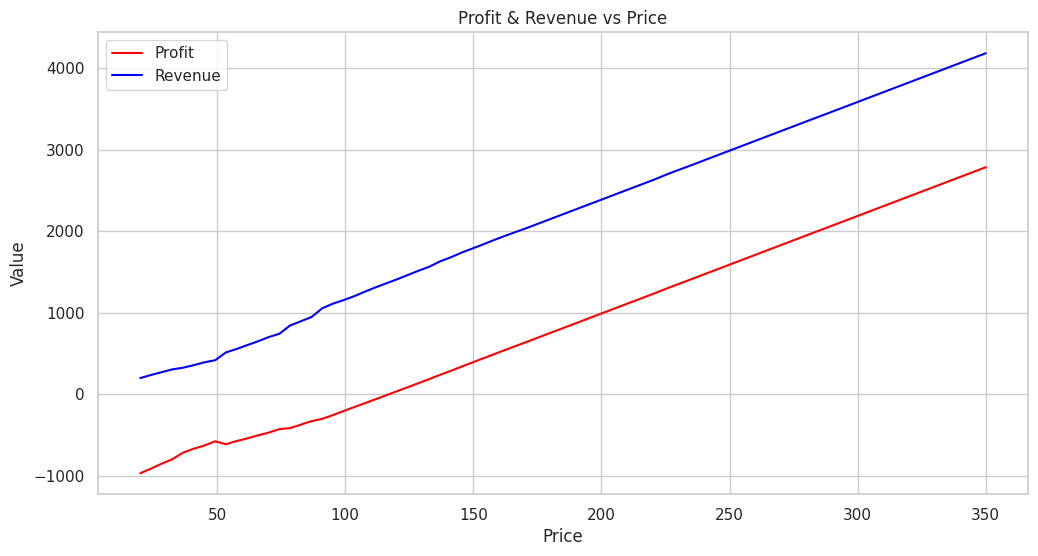

In [18]:
plt.figure(figsize=(12,6))
plt.plot(pc["price"], pc["profit"], label="Profit", color="red")
plt.plot(pc["price"], pc["revenue"], label="Revenue", color="blue")
plt.title("Profit & Revenue vs Price")
plt.xlabel("Price")
plt.ylabel("Value")
plt.legend()
plt.show()

In [19]:
optimal = pc.loc[pc["profit"].idxmax()]
optimal

price       350.000000
q            11.958898
revenue    4185.614186
profit     2787.021103
Name: 79, dtype: float64

**The optimal price is the one that maximizes profit,
not necessarily revenue, because cost structure matters.**

*With competitor prices included, this model resembles
real-world dynamic pricing systems.*

# Business Recommendations

In [20]:
print("Optimal price:", round(optimal["price"],2))
print("Expected demand:", round(optimal["q"],2))
print("Expected profit:", round(optimal["profit"],2))

Optimal price: 350.0
Expected demand: 11.96
Expected profit: 2787.02
